# Dados e Aprendizagem Automática
## Pervisão de *burnout* em trabalhadores


**Dataset:** .xlsx

**Link** https://www.kaggle.com/datasets/vijaysubhashp/employee-burnout-prediction?rvi=1

**Problema:** Prever o *burnout* em trabalhadores.
___
**Features do Dataset:**
* Employee ID - identificador do funcionário (employee).
* Date of Joining - Data em que o funcionário começou a trabalhar.
* Gender - Género do funcionário
* Company Type - Tipo de empresa do funcionário.
* WFH Setup Available - Indica se existem sistemas que permitem o trabalho a partir de casa.
* Designation - Escalão do funiconário.
* Resource Allocation - Número de horas de trabalho por dia.
* Mental Fatigue Score - Nível de fadiga mental do funcionário.
* Burn Rate - Taxa de *burn out* de um funcionário.
___
**Grupo:**
- João Paulo Machado Abreu - pg53928
- João Pedro Dias Faria - pg53939
- Ricardo Cardoso Sousa - pg54179
- Rui Pedro Guise da Silva - pg54213


## Importes e compreensão dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone

Leitura e Visualização do *dataset* (Burnout.xlsx).

In [2]:
#pip install openpyxl #instalação necessária para ler um excel

In [3]:
df = pd.read_excel('./datasets/grupo/Burnout.xlsx')
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


Podemos verificar que este *dataset* contêm 22750 entradas e 9 atributos.

In [4]:
df.shape

(22750, 9)

O *dataset* possui 4 atributos numéricos,

É possivel identificar a preseça de valores nulos em:
*  *Resource Allocation*
*  *Mental Fatigue Score*
*  *Burn Rate*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


Para uma melhor visualização dos valores em falta:

In [6]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [7]:
df.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


O objetivo de trabalhar com este *dataset* é identificar o *burn rate*, sendo a label um valor continuo compreendido entre 0 e 1.

## Exploração e preparação de dados

### 1.Missing values

Começamos o nosso processo de preparação de dados pela exploração dos *missing values* do nosso *dataset*. Para obter uma visualização gráfica dos *missing values* utilizamos o seguinte heatmap.

<Axes: >

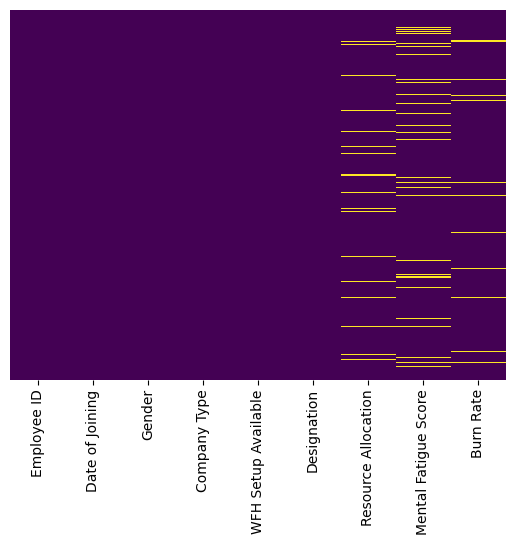

In [8]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

Função para preencher os valores nulos com 0.

In [9]:
def fill_with_zeros(data,columns):
    data = df
    
    data[columns] = data[columns].fillna(0)
    
    return data

In [10]:
def remove_lines(data,columns):
    data = df
    
    data.dropna(subset=columns,inplace=True)
    
    return data

In [11]:
def fill_with_mean(data,columns):
    data = df
    
    data[columns] = data[columns].fillna(data[columns].mean())
    
    return data

In [12]:
df=remove_lines(df,['Burn Rate','Resource Allocation'])

In [13]:
#df=fill_with_zeros(df,['Resource Allocation','Mental Fatigue Score'])

In [14]:
#df=fill_with_mean(df,['Resource Allocation'])

<Axes: xlabel='Designation', ylabel='Mental Fatigue Score'>

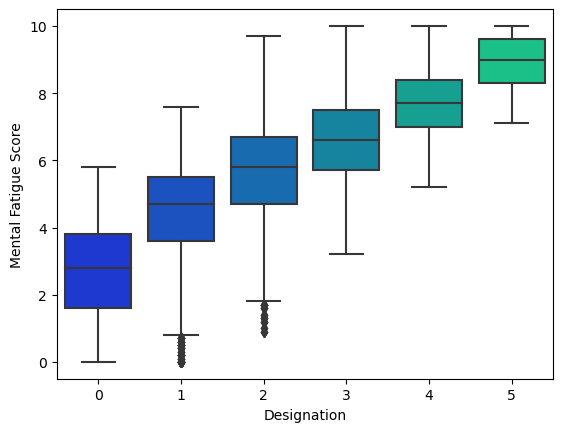

In [15]:
sns.boxplot(x='Designation',y='Mental Fatigue Score',data=df,palette='winter')

In [16]:
medias = df.groupby('Designation')['Mental Fatigue Score'].mean()
print(medias)

Designation
0    2.637157
1    4.443171
2    5.672385
3    6.623577
4    7.735645
5    8.929022
Name: Mental Fatigue Score, dtype: float64


In [17]:
def impute_mental(cols):
    Mental_Fatigue_Score = cols[0]
    Designation = cols[1]
    
    if pd.isnull(Mental_Fatigue_Score):

        if Designation == 1:
            return 4.564954

        elif Designation == 2:
            return 5.673261

        elif Designation == 3:
            return 6.541166
        
        elif Designation == 4:
            return 7.550271
        
        elif Designation == 5:
            return 8.591660
        
        else:
            return 2.924587

    else:
        return Mental_Fatigue_Score

In [18]:
df['Mental Fatigue Score'] = df[['Mental Fatigue Score','Designation']].apply(impute_mental,axis=1)

Podemos verificar então que todos os missing values foram tratados.

<Axes: >

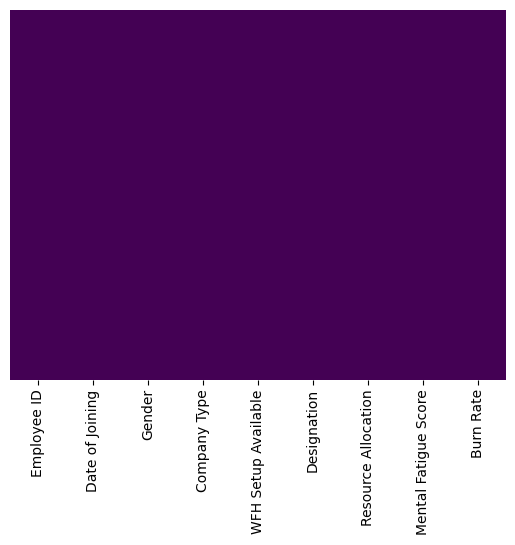

In [19]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

#### Duplicados

O *dataset* não possui valores duplicados, portanto não foi necessário fazer nada a seu respeito.

In [20]:
df.duplicated().sum()

0

#### Drop

Uma vez que a coluna *Employee ID* possui um valor diferente para todos os individuos decidimos removê-la, uma vez que em nada contribui para o treino do modelo.

In [21]:
df.drop(['Employee ID'], axis = 1, inplace = True)

### 2.Dados Categóricos

Em seguida, começamos por tratar os nossos dados categóricos, de todas as técnicas de *encoding* decidimos utilizar a técnica de *One-Hot encoding* em todos os atributos categóricos.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20348 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date of Joining       20348 non-null  datetime64[ns]
 1   Gender                20348 non-null  object        
 2   Company Type          20348 non-null  object        
 3   WFH Setup Available   20348 non-null  object        
 4   Designation           20348 non-null  int64         
 5   Resource Allocation   20348 non-null  float64       
 6   Mental Fatigue Score  20348 non-null  float64       
 7   Burn Rate             20348 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 1.4+ MB


- Gender One-Hot encoding

In [23]:
df['Gender'].value_counts()

Gender
Female    10691
Male       9657
Name: count, dtype: int64

In [24]:
df_v1 = df.copy()
gender_mapper = {'Male':0, 'Female':1}
df_v1['Gender'] = df_v1['Gender'].replace(gender_mapper)
df_v1 = df_v1.join(pd.get_dummies(df_v1['Gender'], prefix='Gender').astype(int))
df_v1.rename(columns={'Gender_0':'Male','Gender_1':'Female'},inplace=True)
df_v1.drop(['Gender'], axis = 1, inplace = True)
df_v1.head()

,Date of Joining,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Male,Female
0,2008-09-30,Service,No,2,3.0,3.8,0.16,0,1
1,2008-11-30,Service,Yes,1,2.0,5.0,0.36,1,0
3,2008-11-03,Service,Yes,1,1.0,2.6,0.20,1,0
4,2008-07-24,Service,No,3,7.0,6.9,0.52,0,1
5,2008-11-26,Product,Yes,2,4.0,3.6,0.29,1,0


- WFH Setup Available One-Hot encoding

In [25]:
df_v1['WFH Setup Available'].value_counts()

WFH Setup Available
Yes    11000
No      9348
Name: count, dtype: int64

In [26]:
workplace_mapper = {'No':0, 'Yes':1}
df_v1['WFH Setup Available'] = df_v1['WFH Setup Available'].replace(workplace_mapper)
df_v1 = df_v1.join(pd.get_dummies(df_v1['WFH Setup Available'], prefix='WFH Setup Available').astype(int))
df_v1.rename(columns={'WFH Setup Available_0':'Office','WFH Setup Available_1':'Home'},inplace=True)
df_v1.drop(['WFH Setup Available'], axis = 1, inplace = True)
df_v1.head()

,Date of Joining,Company Type,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Male,Female,Office,Home
0,2008-09-30,Service,2,3.0,3.8,0.16,0,1,1,0
1,2008-11-30,Service,1,2.0,5.0,0.36,1,0,0,1
3,2008-11-03,Service,1,1.0,2.6,0.20,1,0,0,1
4,2008-07-24,Service,3,7.0,6.9,0.52,0,1,1,0
5,2008-11-26,Product,2,4.0,3.6,0.29,1,0,0,1


- Company Type One-Hot encoding

In [27]:
df_v1['Company Type'].nunique()

2

In [28]:
df_v1['Company Type'].value_counts()

Company Type
Service    13316
Product     7032
Name: count, dtype: int64

In [29]:
company_mapper = {'Service':0, 'Product':1}
df_v1['Company Type'] = df_v1['Company Type'].replace(company_mapper)
df_v1 = df_v1.join(pd.get_dummies(df_v1['Company Type'], prefix='Company Type').astype(int))
df_v1.rename(columns={'Company Type_0':'Service','Company Type_1':'Product'},inplace=True)
df_v1.drop(['Company Type'], axis = 1, inplace = True)
df_v1.head()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Male,Female,Office,Home,Service,Product
0,2008-09-30,2,3.0,3.8,0.16,0,1,1,0,1,0
1,2008-11-30,1,2.0,5.0,0.36,1,0,0,1,1,0
3,2008-11-03,1,1.0,2.6,0.20,1,0,0,1,1,0
4,2008-07-24,3,7.0,6.9,0.52,0,1,1,0,1,0
5,2008-11-26,2,4.0,3.6,0.29,1,0,0,1,0,1


### 3.Handling dates

Para o tratamento das datas decidimos extrair o dia, mês e ano da data, para colunas em separado.

In [30]:
df_v1['Date of Joining'].head()

0   2008-09-30
1   2008-11-30
3   2008-11-03
4   2008-07-24
5   2008-11-26
Name: Date of Joining, dtype: datetime64[ns]

In [31]:
df_v1['year_of_joining'] = df_v1['Date of Joining'].dt.year
df_v1['month_of_joining'] = df_v1['Date of Joining'].dt.month
df_v1['day_of_joining'] = df_v1['Date of Joining'].dt.day

Como podemos constatar, a coluna referente ao ano de junção do funcionário exibe apenas um valor (2008).

In [32]:
df_v1.nunique()

Date of Joining         366
Designation               6
Resource Allocation      10
Mental Fatigue Score    107
Burn Rate               101
Male                      2
Female                    2
Office                    2
Home                      2
Service                   2
Product                   2
year_of_joining           1
month_of_joining         12
day_of_joining           31
dtype: int64

Assim, retiramos também a coluna *year_of_joining* igualmente ao que já tinhamos feito anteriormente com a coluna *Employee ID*

In [33]:
df_v1.drop(['Date of Joining','year_of_joining'], axis = 1, inplace = True)

## Análise Exploratória de Dados

Começamos por analisar a correlação entre os vários atributos, geramos, assim, a seguinte matriz de correlação:

<Axes: >

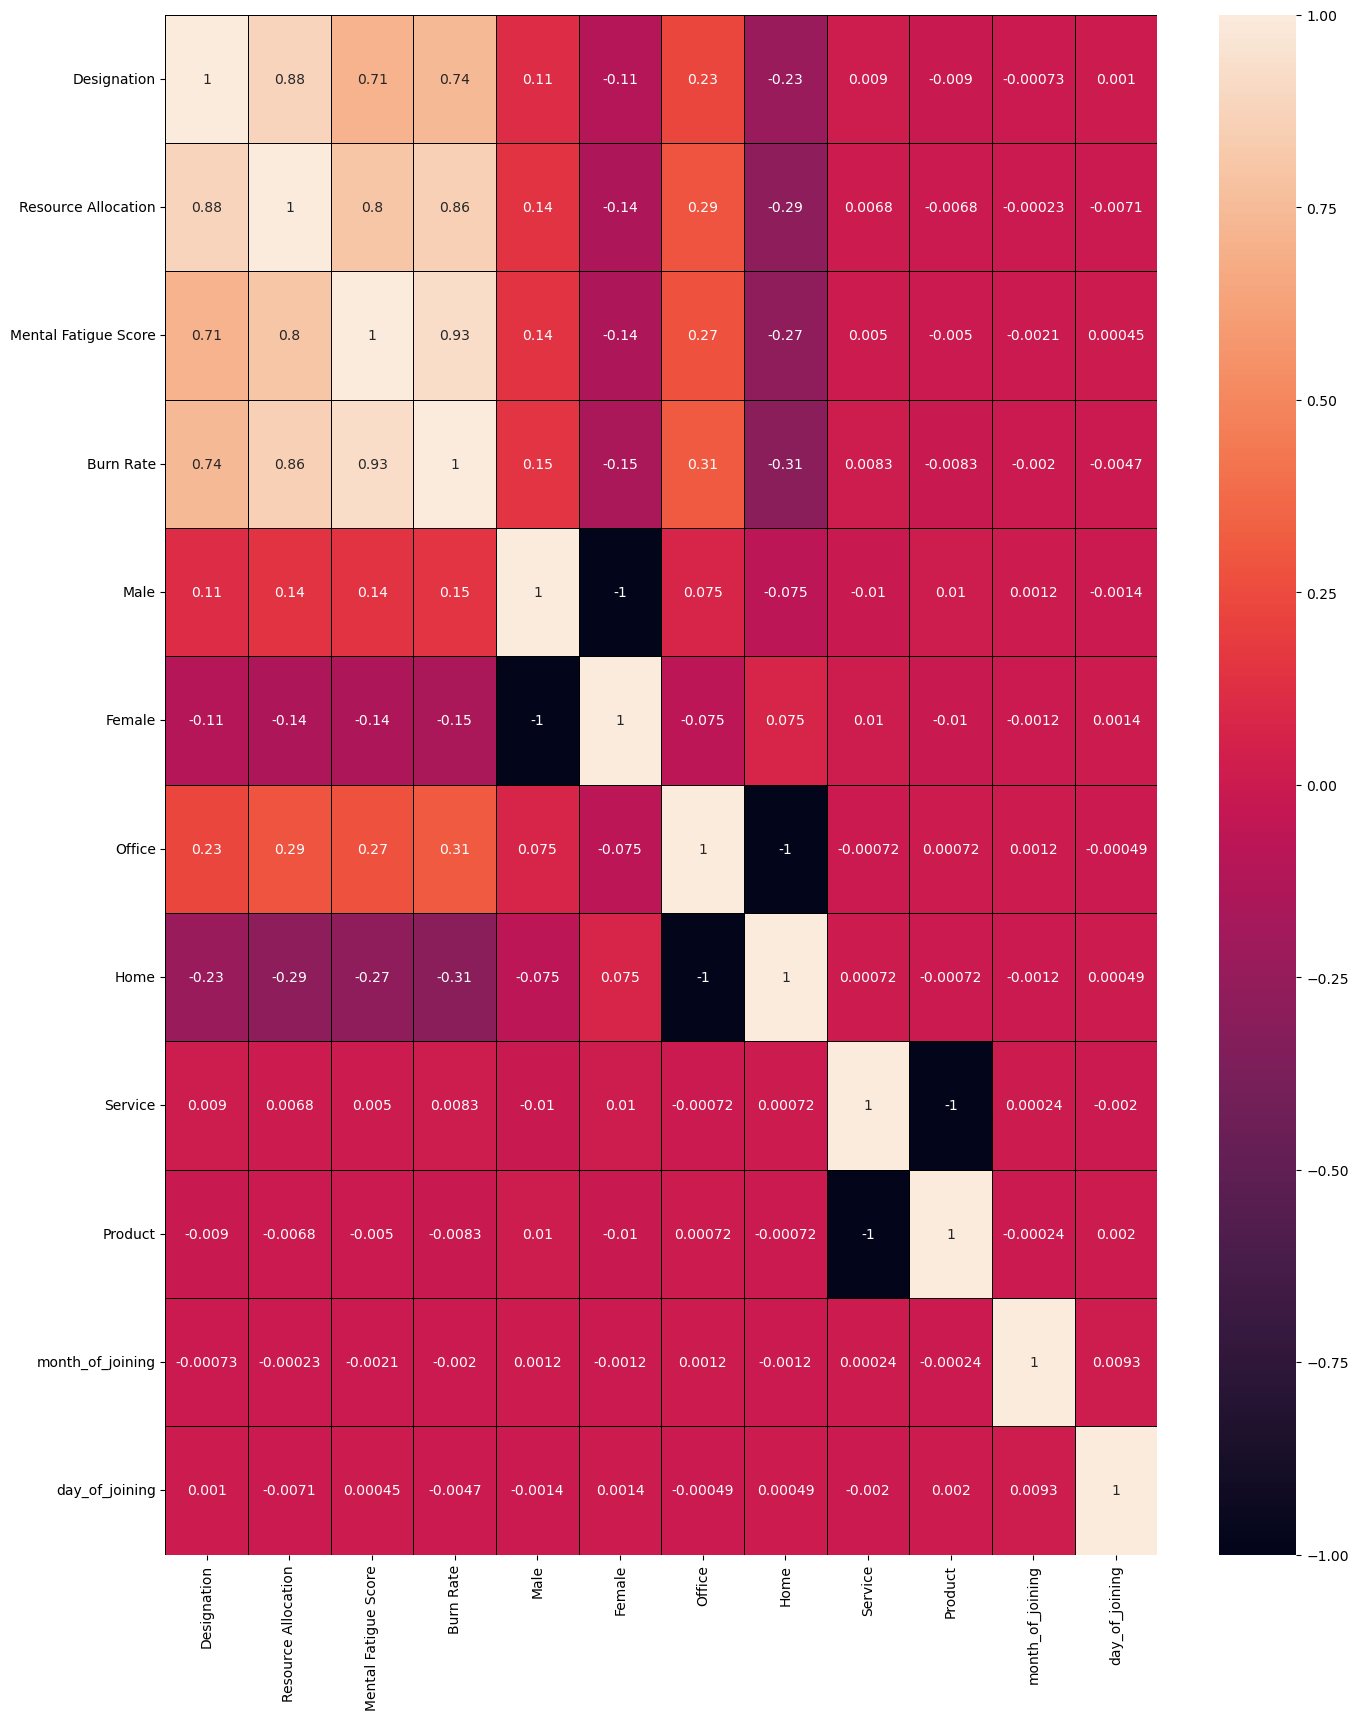

In [34]:
fig = plt.figure(figsize = (16,20))
incidents_corr = df_v1.corr(method = 'pearson')
sns.heatmap(incidents_corr, linecolor='black', linewidth=0.5,annot=True)

Podemos constatar que existem relações fortes entre os seguintes atributos:
- *burn rate* e *designation*
- *burn rate* e *Resource Allocation*
- *burn rate* e *mental fatigue score*

Entretanto, notamos que os atributos seguintes têm uma correlação próxima de zero com os demais atributos:
- *month_of_joining*
- *day_of_joining*

Devido à fraca correlação destes atributos, optamos por removê-los, igualmente ao que havia acontecido com o atributo *Employee ID*.

In [35]:
df_v1.drop(['month_of_joining','day_of_joining'], axis = 1, inplace = True)

In [36]:
df_v1.drop(['Product','Service'], axis = 1, inplace = True)

Há uma pequena diferença na distribuição entre aqueles que possuem sistemas que possibilitam o trabalho remoto em comparação com aqueles que não têm esses sistemas.

<Axes: xlabel='WFH Setup Available', ylabel='count'>

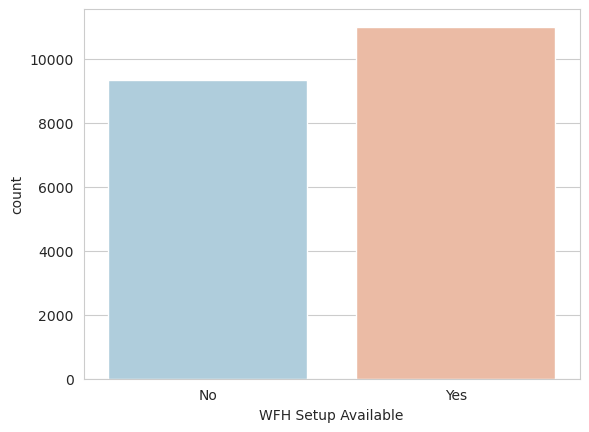

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='WFH Setup Available',data=df,palette='RdBu_r')

Para verificar a distribuição dos valores de *burn rate* utilizamos o seguinte histograma:

<Axes: xlabel='Burn Rate', ylabel='Count'>

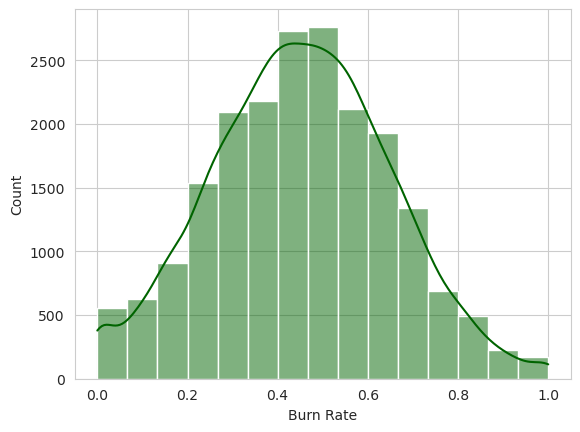

In [38]:
sns.histplot(df_v1['Burn Rate'],bins=15,color='darkgreen',kde=True)

Facilmente interpretamos que a nossa label segue uma distribuição normal.
Podemos observar que a nossa métrica de assimetria (Skewness) exibe um valor muito próximo de zero, indicando uma distribuição próxima à normal para o nosso gráfico.

In [39]:
print(f"Skewness: {df['Burn Rate'].skew()}")

Skewness: 0.04262589219088042


Para cada variável contínua, decidimos utilizar um boxplot para identificar os outliers e destacar a dispersão dos daods de forma clara e rápida. 

Text(0.5, 1.0, 'Designation')

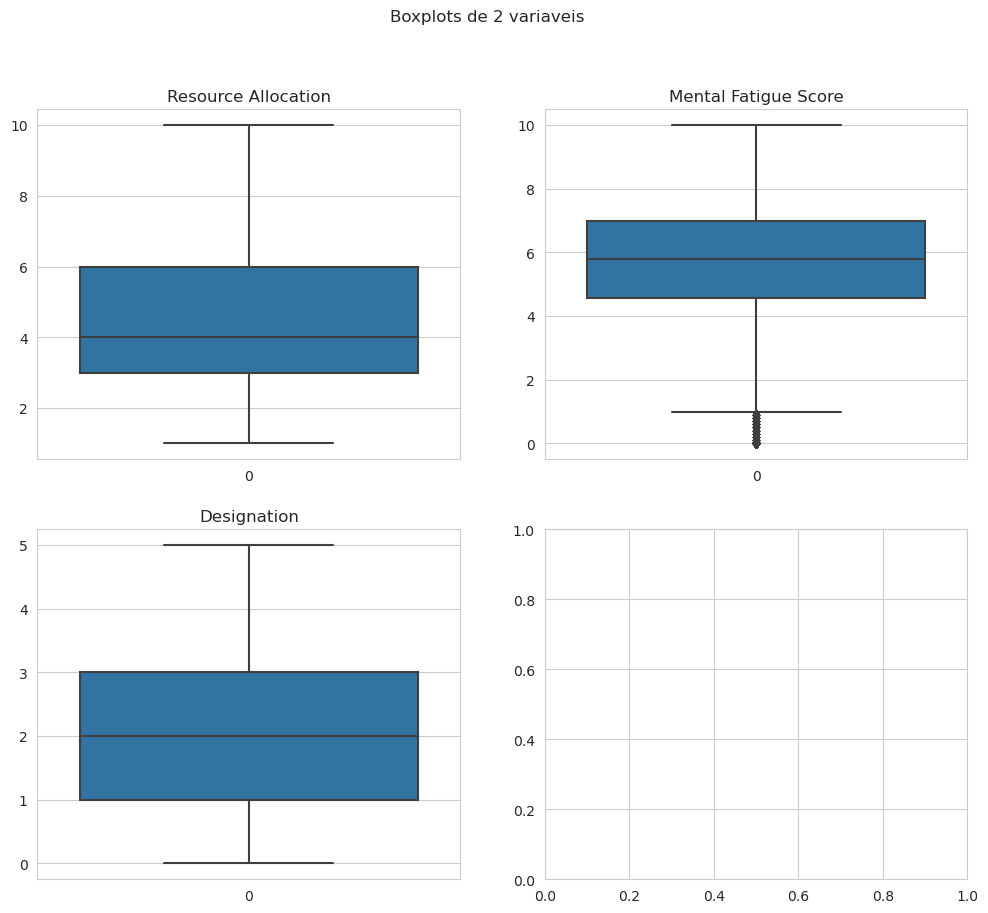

In [40]:
fig,axs=plt.subplots(2,2,figsize=(12,10))
fig.suptitle('Boxplots de 2 variaveis')
sns.boxplot(data=df['Resource Allocation'],ax=axs[0,0])
axs[0,0].set_title('Resource Allocation')
sns.boxplot(data=df['Mental Fatigue Score'],ax=axs[0,1])
axs[0,1].set_title('Mental Fatigue Score')
sns.boxplot(data=df['Designation'],ax=axs[1,0])
axs[1,0].set_title('Designation')

Para além da matriz de correlação criamos também o pairplot, e guardamos o resultado numa imagem (burnratepairplot.png).

In [41]:
#pair_plot=sns.pairplot(df_v1)
#pair_plot.savefig('burnratepairplot.png')

Para uma melhor visualização das relações observadas entre determinadas variaveis no pairplot, procedemos à realização de alguns jointplots, permitindo uma análise mais detalhada e focada nos padrões identificados.

A relação que mais chamou atenção foi entre a label *burn rate* e a *feature mental fatigue score*. 

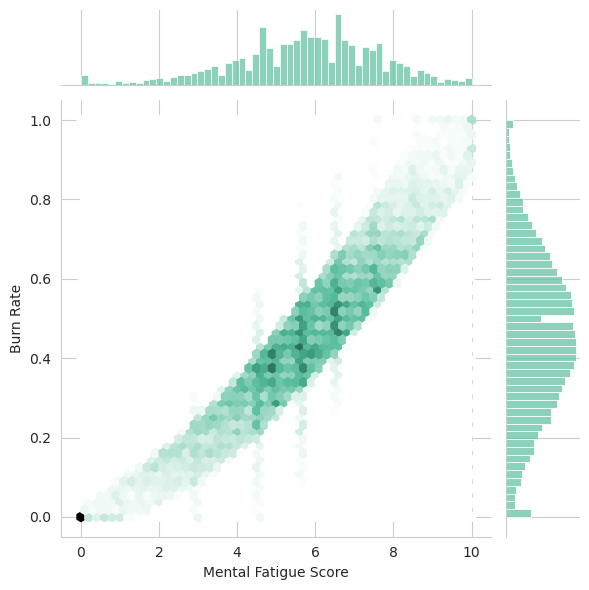

In [42]:
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.jointplot(x='Mental Fatigue Score',y='Burn Rate',data=df_v1,kind="hex")

Uma outra relação identificada tanto no jointplot quanto na matriz de correlação é aquela existente entre a variável alvo (*burn rate*) e a *feature* de *designation*, indicando uma possível associação ou influência mútua entre elas.

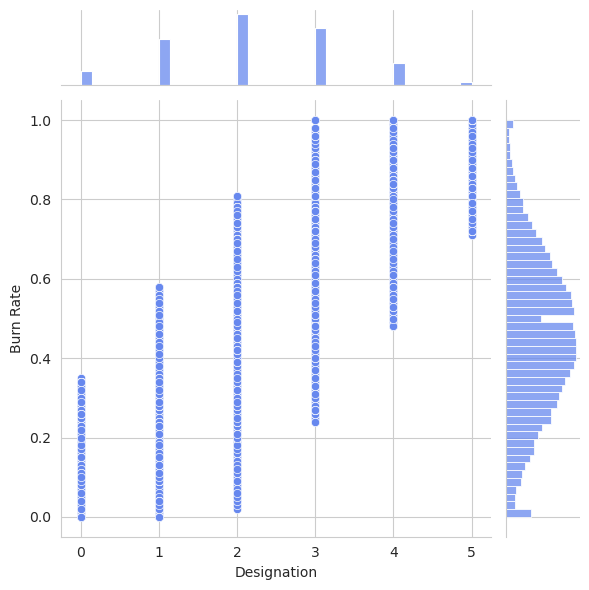

In [43]:
sns.set_style('whitegrid')
sns.set_palette('coolwarm')
sns.jointplot(x='Designation',y='Burn Rate',data=df_v1)

## Conceção do Modelo

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC,SVR

In [46]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

2024-01-10 20:16:30.308925: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
from sklearn import metrics

In [50]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

### Dados de treino e de teste

Antes de treinar os modelos dividimos as **features** e a **label** em duas variaveis diferentes, sendo elas X e y, respetivamente

In [52]:
X = df_v1.drop(['Burn Rate'], axis=1)
y = df_v1['Burn Rate']

Dividimos então os dados em dados de treino e teste utilizando uma técnica de Hold-out Validation.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

De forma, a verificar se os dados de teste estão balanceados de forma semelhante aos dados de treino criamos os dois seguintes diagramas:

Text(0.5, 1.0, 'Treino')

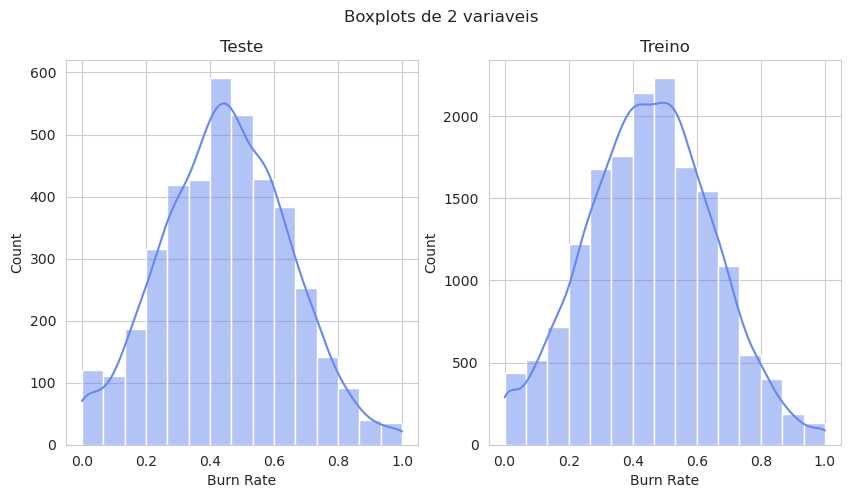

In [54]:
fig,axs=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Boxplots de 2 variaveis')
sns.histplot(data=y_test,ax=axs[0], bins=15,kde=True)
axs[0].set_title('Teste')
sns.histplot(data=y_train,ax=axs[1], bins=15,kde=True)
axs[1].set_title('Treino')

Concluimos então que ambos seguem uma distribuição normal,ou seja, estão distribuidos de forma semelhante.

### Criação e Treino de Modelos

Em seguida, instanciamos o modelo **LinearRegression** e o aplicamos o mesmo aos dados de treino.

In [55]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [56]:
print(lm.intercept_)

-0.08849513389221464


Podemos vericar que:
  - Mantendo todos os outros atributos fixos, um aumento de 1 unidade no atributo  *Designation* está associado a uma diminuição de 0.011653 no atributo *Burn Rate* 
  - Mantendo todos os outros atributos fixos, um aumento de 1 unidade no atributo *Resource Allocation* está associado a um aumento de 0.035824 no atributo *Burn Rate*
  - Mantendo todos os outros atributos fixos, um aumento de 1 unidade no atributo *Mental Fatigue Score* está associado a um aumento de 0.070855 no atributo *Burn Rate*

In [57]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Designation,-0.011650
Resource Allocation,0.035825
Mental Fatigue Score,0.070854
Male,0.001943
Female,-0.001943
Office,0.006810
Home,-0.006810


Uma vez treinado o modelo aplicamo-lo então aos dados de teste para obter uma previsão

In [58]:
prediction_lm = lm.predict(X_test)

Comparamos de seguida a previsão obtida com os dados de teste

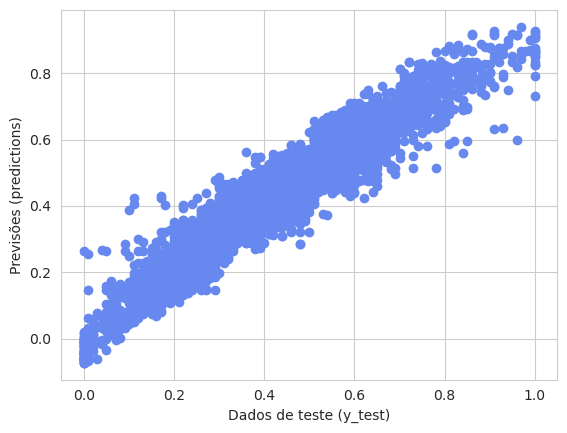

In [59]:
plt.xlabel('Dados de teste (y_test)')
plt.ylabel('Previsões (predictions)')
plt.scatter(y_test,prediction_lm)

In [60]:
print(f'MAE: {mean_absolute_error(y_test, prediction_lm)}')
print(f'MSE: {mean_squared_error(y_test, prediction_lm)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, prediction_lm))}')
r2score = lm.score(X_test, y_test)
print(f'R-squared score: {r2score}')

MAE: 0.04872399285439895
MSE: 0.0038600687723920513
RMSE: 0.062129451730979016
R-squared score: 0.9011000003884794


* MAE: 0.044891505395085185
* MSE: 0.002991739365860408
* RMSE: 0.054696794840835124
* R-squared score: 0.9256166750779647

/home/rui/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


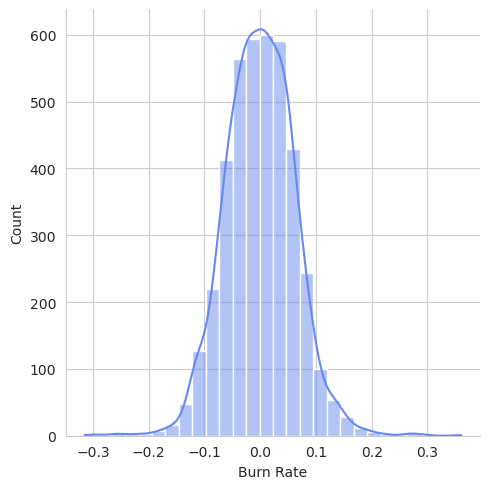

In [61]:
sns.displot((y_test-prediction_lm), bins=28, kde=True)

### SVR

In [62]:
svr = GridSearchCV(
    SVR(kernel="rbf"),
    param_grid={"C": [400,500,600], "gamma":[1,0.01,0.0001]},refit=True,verbose=3,scoring='neg_mean_absolute_error'
)

In [63]:
svr.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...................C=400, gamma=1;, score=-0.055 total time=  29.0s
[CV 2/5] END ...................C=400, gamma=1;, score=-0.054 total time=  27.0s
[CV 3/5] END ...................C=400, gamma=1;, score=-0.055 total time=  31.7s
[CV 4/5] END ...................C=400, gamma=1;, score=-0.055 total time=  32.3s
[CV 5/5] END ...................C=400, gamma=1;, score=-0.056 total time=  29.5s
[CV 1/5] END ................C=400, gamma=0.01;, score=-0.050 total time=   7.7s
[CV 2/5] END ................C=400, gamma=0.01;, score=-0.052 total time=   7.5s
[CV 3/5] END ................C=400, gamma=0.01;, score=-0.051 total time=   7.8s
[CV 4/5] END ................C=400, gamma=0.01;, score=-0.051 total time=   7.8s
[CV 5/5] END ................C=400, gamma=0.01;, score=-0.053 total time=   7.3s
[CV 1/5] END ..............C=400, gamma=0.0001;, score=-0.050 total time=   1.5s
[CV 2/5] END ..............C=400, gamma=0.0001;, 

GridSearchCV(estimator=SVR(),
             param_grid={'C': [400, 500, 600], 'gamma': [1, 0.01, 0.0001]},
             scoring='neg_mean_absolute_error', verbose=3)

In [64]:
best_model = svr.best_estimator_
best_model

SVR(C=400, gamma=0.0001)

In [65]:
prediction_svr = svr.predict(X_test)

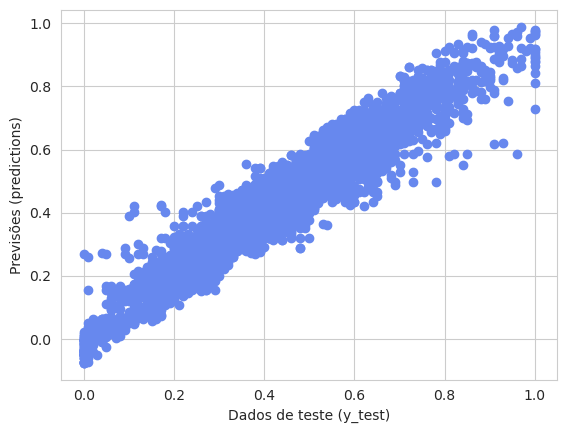

In [66]:
plt.xlabel('Dados de teste (y_test)')
plt.ylabel('Previsões (predictions)')
plt.scatter(y_test,prediction_svr)

In [67]:
print(f'MAE: {mean_absolute_error(y_test, prediction_svr)}')
print(f'MSE: {mean_squared_error(y_test, prediction_svr)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, prediction_svr))}')
r2score = lm.score(X_test, y_test)
print(f'R-squared score: {r2score}')

MAE: 0.04954229400349311
MSE: 0.0039086508165031226
RMSE: 0.06251920358180454
R-squared score: 0.9011000003884794


### Artificial Neural Network

In [68]:
y=y.to_frame()

In [69]:
scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]),columns=X.columns)
scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y)
y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]),columns=y.columns)

In [70]:
X_train_s,X_test_s,y_train_s,y_test_s = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=2021)

In [71]:
def build_model(activation='relu',learning_rate=0.01):
    model=Sequential()
    model.add(Dense(16,input_dim=7,activation=activation))
    model.add(Dense(9,activation=activation))
    model.add(Dense(1,activation=activation))
    
    model.compile(
        loss='mae',
        optimizer=tf.optimizers.Adam(learning_rate),
        metrics=['mae','mse'])
    return model

In [72]:
optimizer=['SGD','RMSprop','Adagrad']
activation=['sigmoid','relu']
param_grid =dict(optimizer=optimizer)

In [73]:
kf = KFold(n_splits=5,shuffle=True,random_state=2021)

In [74]:
model = KerasRegressor(model=build_model,batch_size=100,validation_split=0.2,epochs=80)

In [75]:
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=kf,scoring='neg_mean_absolute_error',refit='True',verbose=1)

In [76]:
grid_search.fit(X_train_s,y_train_s)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


2024-01-10 20:28:18.015154: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/80
105/105 [==============================] - 2s 15ms/step - loss: 0.0817 - mae: 0.0817 - mse: 0.0138 - val_loss: 0.0533 - val_mae: 0.0533 - val_mse: 0.0046
Epoch 2/80
105/105 [==============================] - 1s 14ms/step - loss: 0.0518 - mae: 0.0518 - mse: 0.0045 - val_loss: 0.0513 - val_mae: 0.0513 - val_mse: 0.0042
Epoch 3/80
105/105 [==============================] - 1s 13ms/step - loss: 0.0505 - mae: 0.0505 - mse: 0.0042 - val_loss: 0.0519 - val_mae: 0.0519 - val_mse: 0.0044
Epoch 4/80
105/105 [==============================] - 1s 13ms/step - loss: 0.0505 - mae: 0.0505 - mse: 0.0042 - val_loss: 0.0527 - val_mae: 0.0527 - val_mse: 0.0045
Epoch 5/80
105/105 [==============================] - 2s 17ms/step - loss: 0.0513 - mae: 0.0513 - mse: 0.0044 - val_loss: 0.0512 - val_mae: 0.0512 - val_mse: 0.0043
Epoch 6/80
105/105 [==============================] - 1s 12ms/step - loss: 0.0503 - mae: 0.0503 - mse: 0.0042 - val_loss: 0.0525 - val_mae: 0.0525 - val_mse: 0.0045
Epoch 7/80

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=KerasRegressor(batch_size=100, epochs=80, model=<function build_model at 0x7f5fde026f80>, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             refit='True', scoring='neg_mean_absolute_error', verbose=1)

In [77]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: -0.048788 using {'optimizer': 'RMSprop'}


In [78]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [79]:
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,stdev,param))

-0.049524 (0.000701) with: {'optimizer': 'SGD'}
-0.048788 (0.000648) with: {'optimizer': 'RMSprop'}
-0.129564 (0.158893) with: {'optimizer': 'Adagrad'}


In [80]:
best_mlp_model = grid_search.best_estimator_
print(best_mlp_model)

KerasRegressor(
	model=<function build_model at 0x7f5fde026f80>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=100
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=80
)


In [81]:
best_mlp_model.fit(X_train_s,y_train_s,epochs=20,validation_data=(X_test_s,y_test_s),verbose=1)

Epoch 1/20
163/163 [==============================] - 3s 17ms/step - loss: 0.0898 - mae: 0.0898 - mse: 0.0196 - val_loss: 0.0525 - val_mae: 0.0525 - val_mse: 0.0044
Epoch 2/20
163/163 [==============================] - 2s 12ms/step - loss: 0.0519 - mae: 0.0519 - mse: 0.0044 - val_loss: 0.0496 - val_mae: 0.0496 - val_mse: 0.0040
Epoch 3/20
163/163 [==============================] - 3s 16ms/step - loss: 0.0512 - mae: 0.0512 - mse: 0.0043 - val_loss: 0.0512 - val_mae: 0.0512 - val_mse: 0.0042
Epoch 4/20
163/163 [==============================] - 2s 14ms/step - loss: 0.0517 - mae: 0.0517 - mse: 0.0044 - val_loss: 0.0498 - val_mae: 0.0498 - val_mse: 0.0040
Epoch 5/20
163/163 [==============================] - 2s 15ms/step - loss: 0.0515 - mae: 0.0515 - mse: 0.0044 - val_loss: 0.0531 - val_mae: 0.0531 - val_mse: 0.0045
Epoch 6/20
163/163 [==============================] - 3s 17ms/step - loss: 0.0503 - mae: 0.0503 - mse: 0.0042 - val_loss: 0.0486 - val_mae: 0.0486 - val_mse: 0.0038
Epoch 7/20

KerasRegressor(
	model=<function build_model at 0x7f5fde026f80>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=100
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=80
)

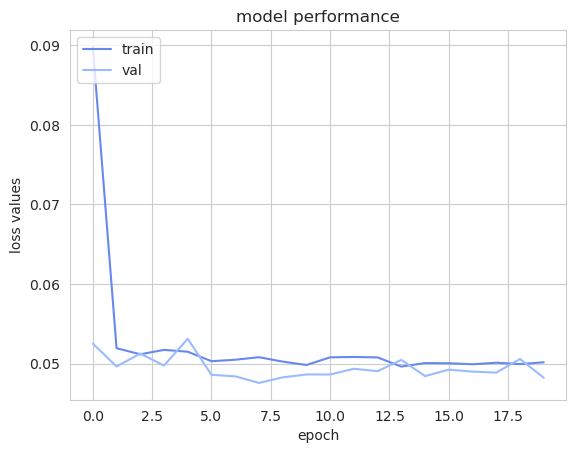

In [82]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

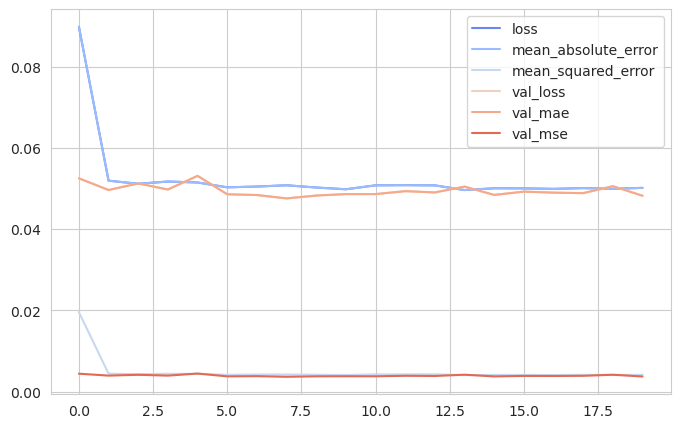

In [83]:
pd.DataFrame(best_mlp_model.history_).plot(figsize=(8,5))
plt.show()

In [84]:
predictions=best_mlp_model.predict(X_test_s)

41/41 [==============================] - 1s 12ms/step


In [85]:
predictions_ann = predictions.reshape(predictions.shape[0],1)

In [86]:
predictions_ann[:5]

array([[0.34840378],
       [0.6501323 ],
       [0.8284943 ],
       [0.6072192 ],
       [0.17983884]], dtype=float32)

In [87]:
predictions_ann_unscaled = scaler_y.inverse_transform(predictions_ann)

In [88]:
predictions_ann_unscaled[:5]

array([[0.34840378],
       [0.6501323 ],
       [0.8284943 ],
       [0.6072192 ],
       [0.17983884]], dtype=float32)

In [89]:
y_test_unscaled=scaler_y.inverse_transform(y_test_s)

In [90]:
print(f'MAE: {mean_absolute_error(y_test_unscaled, predictions_ann)}')
print(f'MSE: {mean_squared_error(y_test_unscaled, predictions_ann)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test_unscaled, predictions_ann))}')

MAE: 0.048217227288524116
MSE: 0.0037480777355242247
RMSE: 0.06122154633398461


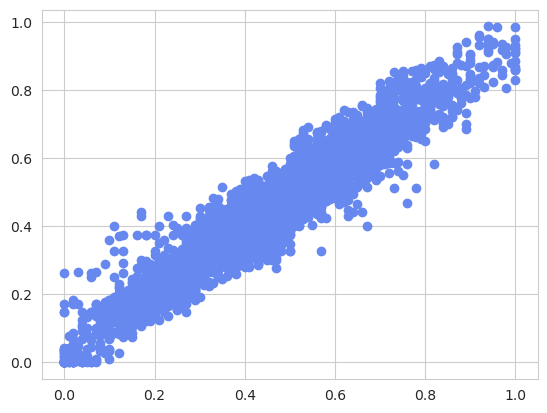

In [91]:
plt.scatter(y_test_unscaled,predictions_ann)

In [92]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test_unscaled[:limit],color='green',label='Actual')
    plt.plot(predictions_ann_unscaled[:limit],color='red',label='Predicted')
    plt.grid(alpha=0.3)
    plt.xlabel('Houses')
    plt.ylabel('Price')
    plt.title('Real vs Predicted')
    plt.legend()
    plt.show()

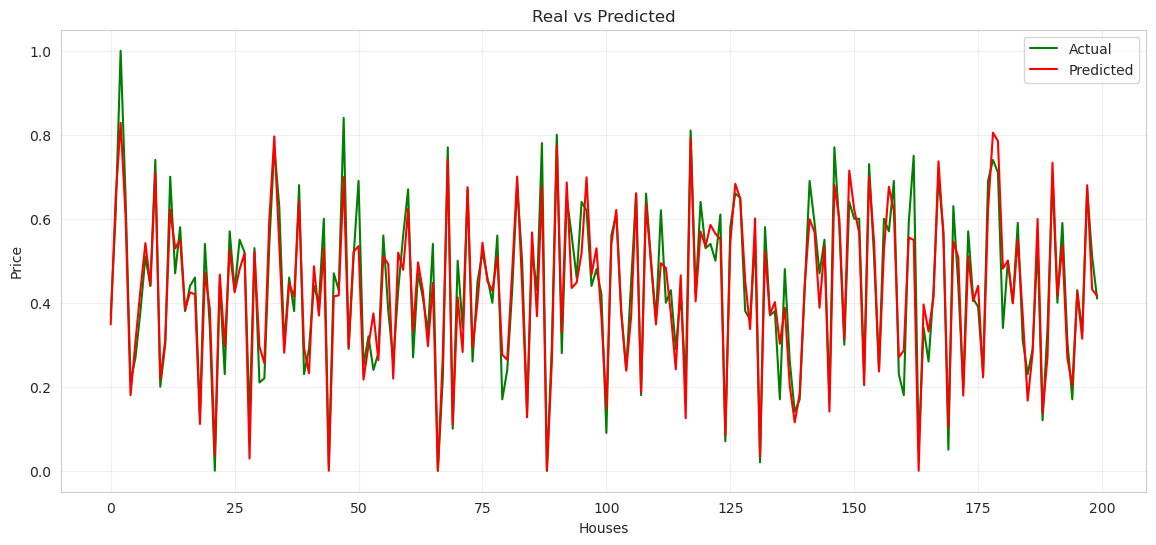

In [93]:
real_predicted_viz(200)

### GradientBoosting

In [94]:
param_boost = {'learning_rate': [0.01,0.02,0.03],'subsample': [0.1, 0.2, 0.4],'n_estimators' : [128,256,512],'max_depth': [4,8,12]}

In [95]:
estimator_boost=GradientBoostingRegressor()
grid_boost=GridSearchCV(estimator_boost,param_boost,refit=True,verbose=0)

In [96]:
grid_boost.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [4, 8, 12],
                         'n_estimators': [128, 256, 512],
                         'subsample': [0.1, 0.2, 0.4]})

In [97]:
grid_boost.best_params_

{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 512, 'subsample': 0.4}

In [98]:
boost_score = grid_boost.score(X_test,y_test)

In [99]:
prediction_boost=grid_boost.predict(X_test)

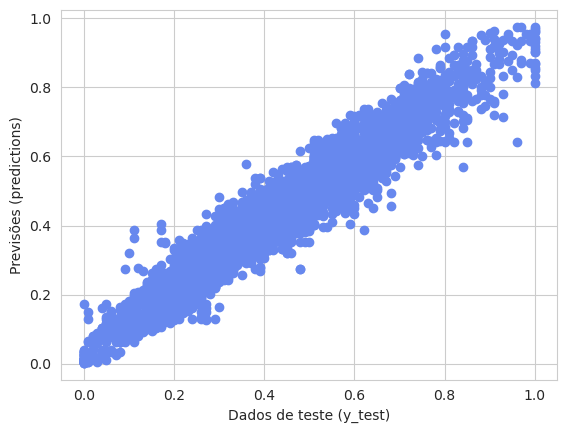

In [100]:
plt.xlabel('Dados de teste (y_test)')
plt.ylabel('Previsões (predictions)')
plt.scatter(y_test,prediction_boost)

In [101]:
print(f'MAE: {mean_absolute_error(y_test, prediction_boost)}')
print(f'MSE: {mean_squared_error(y_test, prediction_boost)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, prediction_boost))}')

MAE: 0.045546670468378576
MSE: 0.00329982576622636
RMSE: 0.057444109935017355


In [102]:
models = ['LinearRegression', 'SVR', 'ANN', 'GradientBoosting']

In [103]:
mae_values = [mean_absolute_error(y_test, prediction_lm), mean_absolute_error(y_test, prediction_svr), mean_absolute_error(y_test_unscaled, predictions_ann), mean_absolute_error(y_test, prediction_boost)]

Text(0.5, 1.0, 'Comparação de MAE entre Modelos')

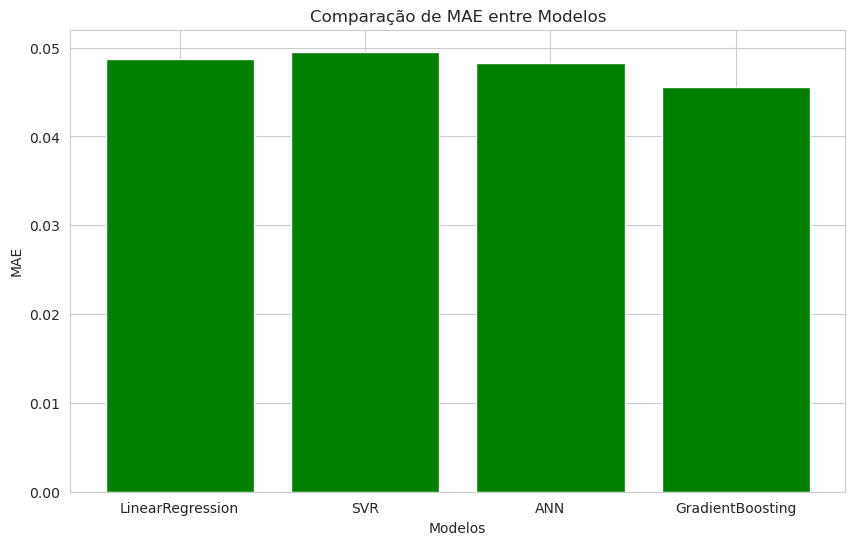

In [105]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color='green')

# Adicionar rótulos e título
plt.xlabel('Modelos')
plt.ylabel('MAE')
plt.title('Comparação de MAE entre Modelos')